# Notebook for first assessment

### Import of libraries

In [1]:
import pypowsybl.network as pp
import pypowsybl.loadflow as lf

In [2]:
import pandapower as pdp
import pandapower.networks as pn
from pandapower.plotting.plotly import simple_plotly

In [3]:
import grid2op

C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\test-paKUVtLg-py3.10\lib\site-packages\grid2op\Backend\PandaPowerBackend.py:31: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\test-paKUVtLg-py3.10\Scripts\python.exe -m pip install numba

  warnings.warn(


## First part : drop IEEE14 realisitic scenario by Grid2op and load it with pypowsybl

#### Export of Grid2op IEEE14 realistic scenario by Grid2op

In [4]:
env = grid2op.make("rte_case14_realistic")

Use of pandapower (which is the default backend of Grid2op) to convert our grid file to a .mat file rather then a .json file. Pypowsybl could only read matpower, xiidm, UCTE, CGMES, PSS/E or IEEE-CDF type of file. So this is the only possible type of file that is making the bridge between pandapower and powsybl backend.

In [5]:
_ = pdp.converter.to_mpc(env.backend._grid, "case14_grid2op_realistic.mat")

gen vm_pu > bus max_vm_pu for gens [2 3]. Setting bus limit for these gens.


#### Load of Grid2op's IEEE14 realistic dropped matpower file with pypowsybl

In [6]:
pypowsybl_network = pp.load("case14_grid2op_realistic.mat",{'matpower.import.ignore-base-voltage' : 'false'}) #change the voltage from per unit to Kv

#### Visualisation of the network

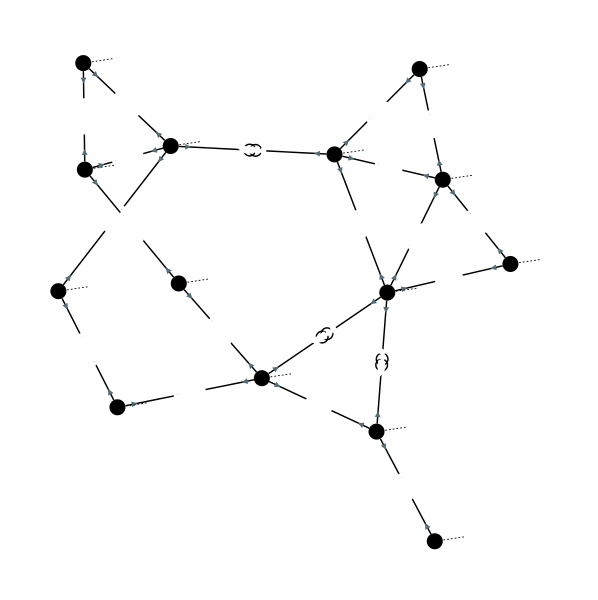

In [7]:
pypowsybl_network.get_network_area_diagram()

#### Run of a loadflow with pypowsybl

AC loadflow

In [8]:
results_pypow_ac = lf.run_ac(pypowsybl_network,parameters=lf.Parameters(distributed_slack=False))
print(results_pypow_ac)

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=8, slack_bus_id='VL-1_0', slack_bus_active_power_mismatch=7.082909160023066, distributed_active_power=8.627012866844364)]


DC loadflow (optionnal run AC or DC but not both)

In [9]:
results_pypow_dc = lf.run_dc(pypowsybl_network,parameters=lf.Parameters(distributed_slack=False))
print(results_pypow_dc)

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=0, slack_bus_id='VL-1_0', slack_bus_active_power_mismatch=-3.7000045776367148, distributed_active_power=nan)]


## Second Part : Take an action on the network

#### An agent takes an action on the network : disconnection of the Line 4-5

In [10]:
pypowsybl_network.update_lines(id='LINE-4-5', connected1=False,connected2=False)

#### Visualisation of the network

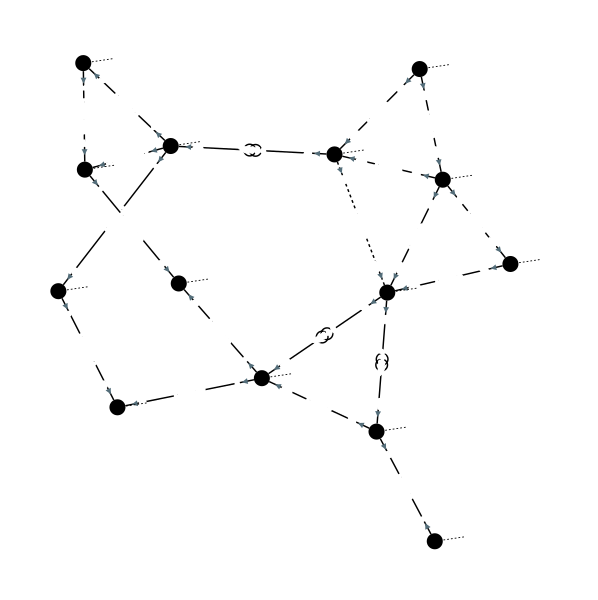

In [11]:
pypowsybl_network.get_network_area_diagram()

#### Run of a loadflow

AC loadflow

In [12]:
results_pypow_after_disconnection_ac = lf.run_ac(pypowsybl_network,parameters=lf.Parameters(distributed_slack=False))
print(results_pypow_after_disconnection_ac)

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=9, slack_bus_id='VL-1_0', slack_bus_active_power_mismatch=9.048937323852545, distributed_active_power=7.7717968118416465)]


DC loadflow (optionnal run AC or DC but not both)

In [13]:
results_pypow_after_disconnection_dc = lf.run_dc(pypowsybl_network,parameters=lf.Parameters(distributed_slack=False))
print(results_pypow_after_disconnection_dc)

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=0, slack_bus_id='VL-1_0', slack_bus_active_power_mismatch=-3.7000045776367148, distributed_active_power=nan)]


#### Final visualisation

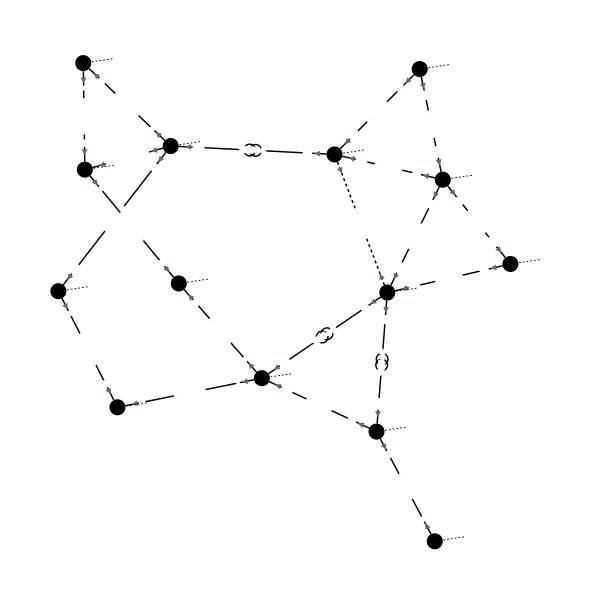

In [14]:
pypowsybl_network.get_network_area_diagram()